<a href="https://colab.research.google.com/github/joydeep10/Analyzing_EV_Landscape/blob/main/EV_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Internship_tasks/EDA Project 2 - Analysis on Electric Vehicles/EV_dataset.csv')

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
df['Electric Vehicle Type'].value_counts()

,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),86044
Plug-in Hybrid Electric Vehicle (PHEV),26590


In [ ]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Clean Alternative Fuel Vehicle Eligible,58639
Eligibility unknown as battery range has not been researched,39236
Not eligible due to low battery range,14759


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


there are less missing values, which is managable

In [ ]:
df.shape

(112634, 17)

In [ ]:
df = df.dropna(subset=['Model'])

median_leg_district = df['Legislative District'].median()
df['Legislative District'].fillna(median_leg_district, inplace=True)

df['Vehicle Location'].fillna('Unknown Location', inplace=True)
df['Electric Utility'].fillna('Unknown Utility', inplace=True)

<ipython-input-10-2324b4f47273>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Legislative District'].fillna(median_leg_district, inplace=True)
<ipython-input-10-2324b4f47273>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Legislative District'].fillna(median_leg_district, inplace=True)
<ipython-input-10-2324b4f47273>:6: FutureWarn

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
num_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.select_dtypes(include=['object'])

# Univariate and Bivariate Analysis

In [ ]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [ ]:
def categorical_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [ ]:
numerical_univariate_analysis(num_df)

********** Postal Code **********
min        1730.000000
max       99701.000000
mean      98156.234278
median    98120.000000
std        2648.967665
Name: Postal Code, dtype: float64

********** Model Year **********
min       1997.000000
max       2023.000000
mean      2019.002655
median    2020.000000
std          2.892130
Name: Model Year, dtype: float64

********** Electric Range **********
min         0.000000
max       337.000000
mean       87.828583
median     32.000000
std       102.336611
Name: Electric Range, dtype: float64

********** Base MSRP **********
min            0.000000
max       845000.000000
mean        1793.758192
median         0.000000
std        10784.684549
Name: Base MSRP, dtype: float64

********** Legislative District **********
min        1.000000
max       49.000000
mean      29.816080
median    34.000000
std       14.683116
Name: Legislative District, dtype: float64

********** DOL Vehicle ID **********
min       4.777000e+03
max       4.792548e+08
mean

In [ ]:
categorical_univariate_analysis(cat_df)

********** VIN (1-10) **********
count                                                 112614
nunique                                                 7531
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
Name: VIN (1-10), dtype: object
Value Counts: 
 VIN (1-10)
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
YV4BR0DL4K      1
YV4H60CM2N      1
WA1VCBGE9N      1
WP0AH2A73M      1
WA1LAAGE5M      1
Name: count, Length: 7531, dtype: int64

********** County **********
count                                                 112614
nunique                                                  165
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
Name: County, dtype: object
Value Counts: 
 County
King          58985
Snohomish     12432
Pierce         8533
Clark          6689
Thurston       4126
              ...  
Pinal             1
Elmore            1
Portsmouth        1
Kings             1
Kootenai          1
Nam

In [ ]:
print(num_df.var())

Postal Code             7.017030e+06
Model Year              8.364418e+00
Electric Range          1.047278e+04
Base MSRP               1.163094e+08
Legislative District    2.155939e+02
DOL Vehicle ID          8.834528e+15
2020 Census Tract       2.887468e+18
dtype: float64


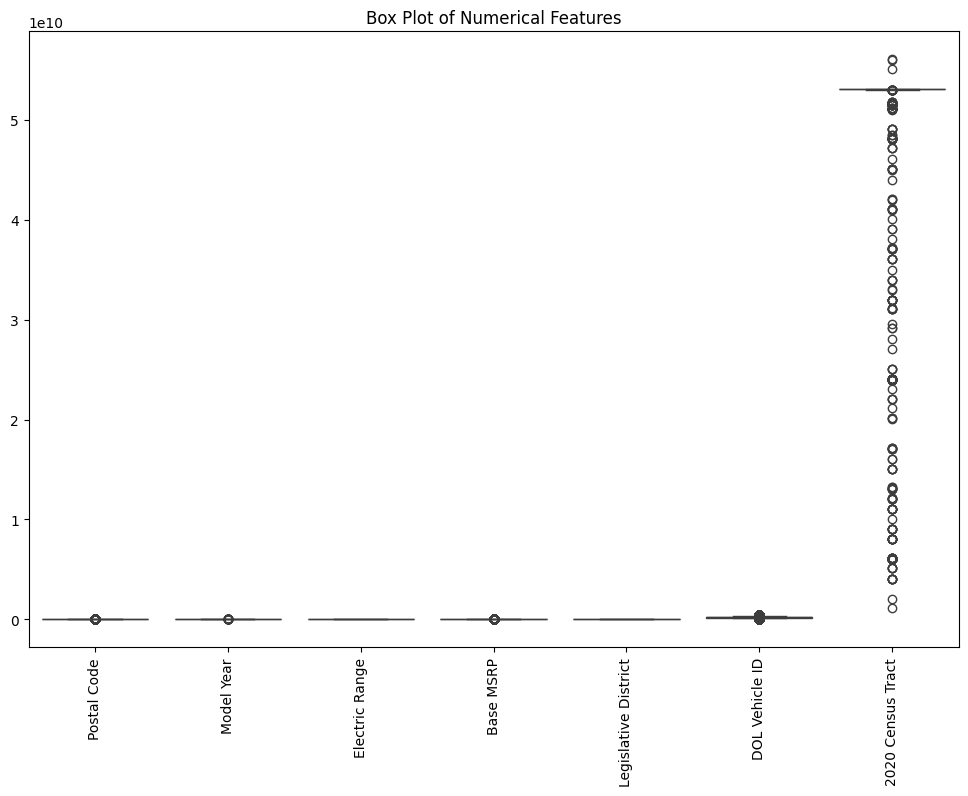

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=num_df)
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()

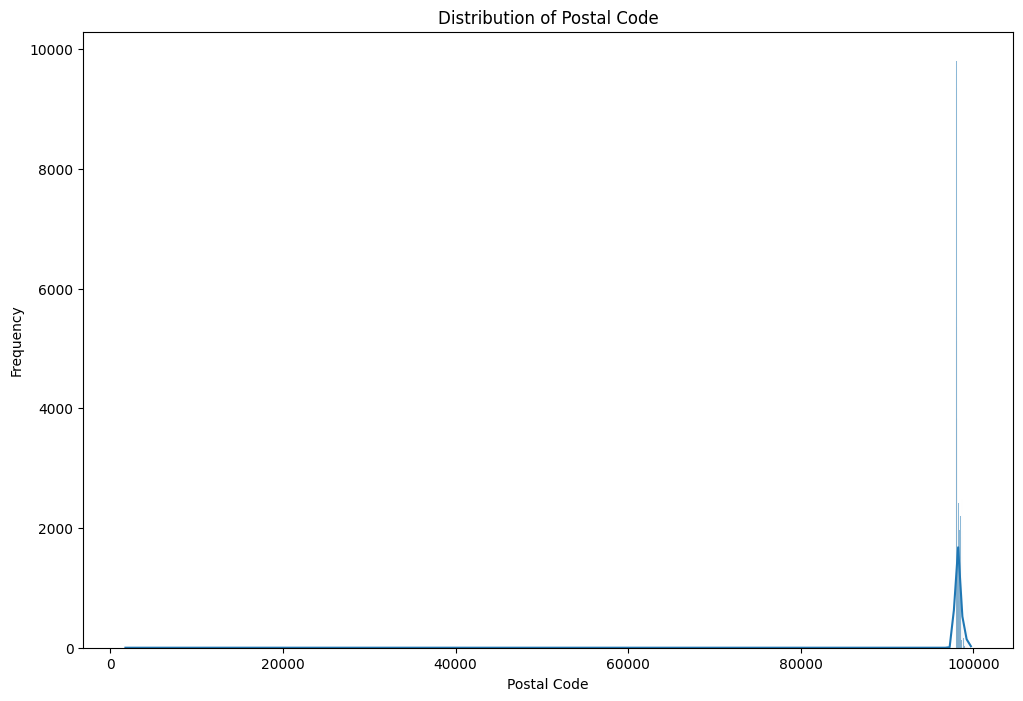

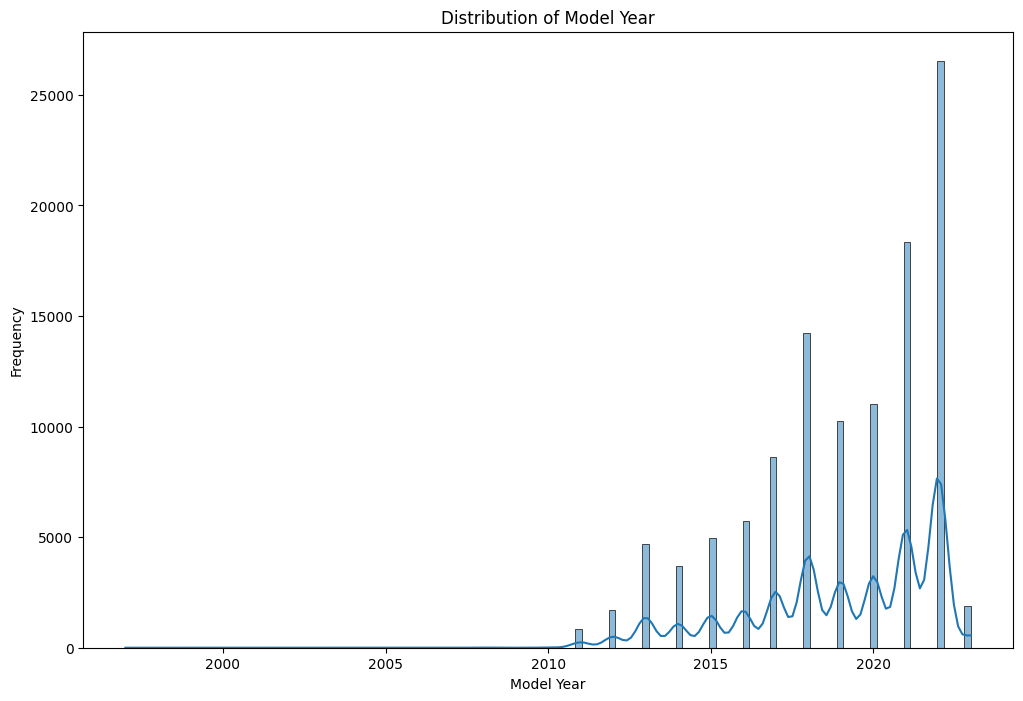

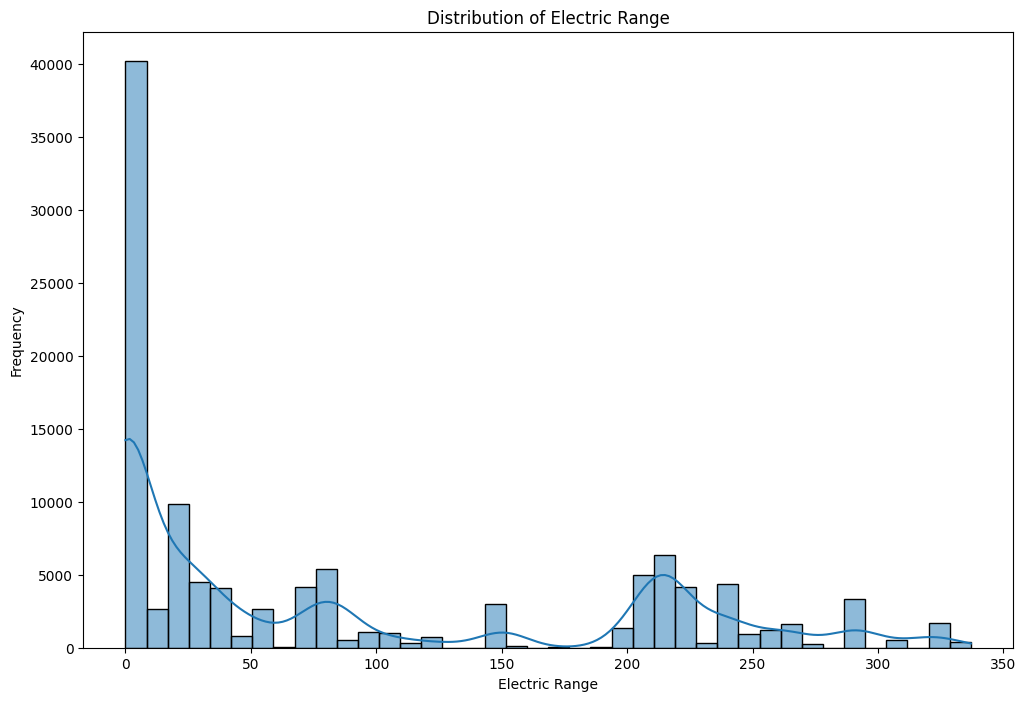

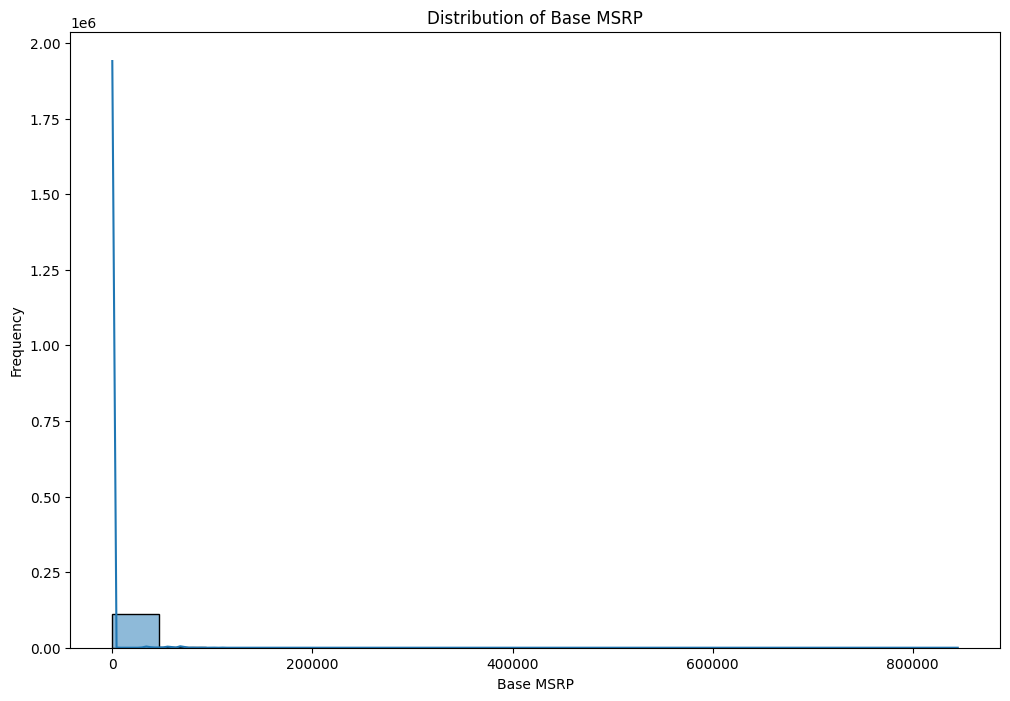

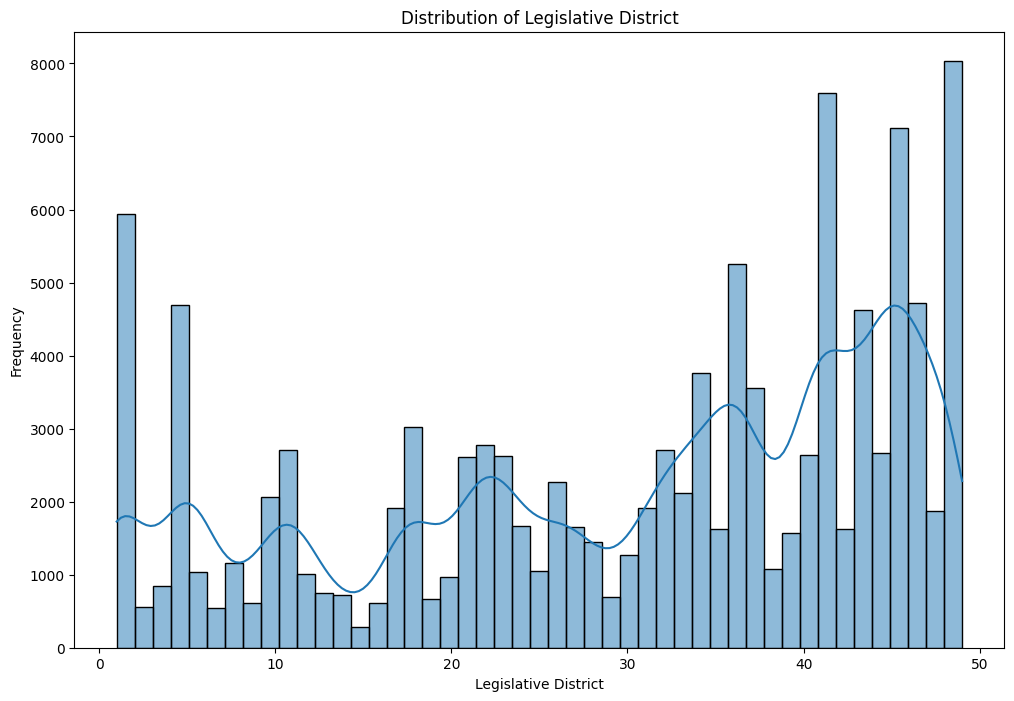

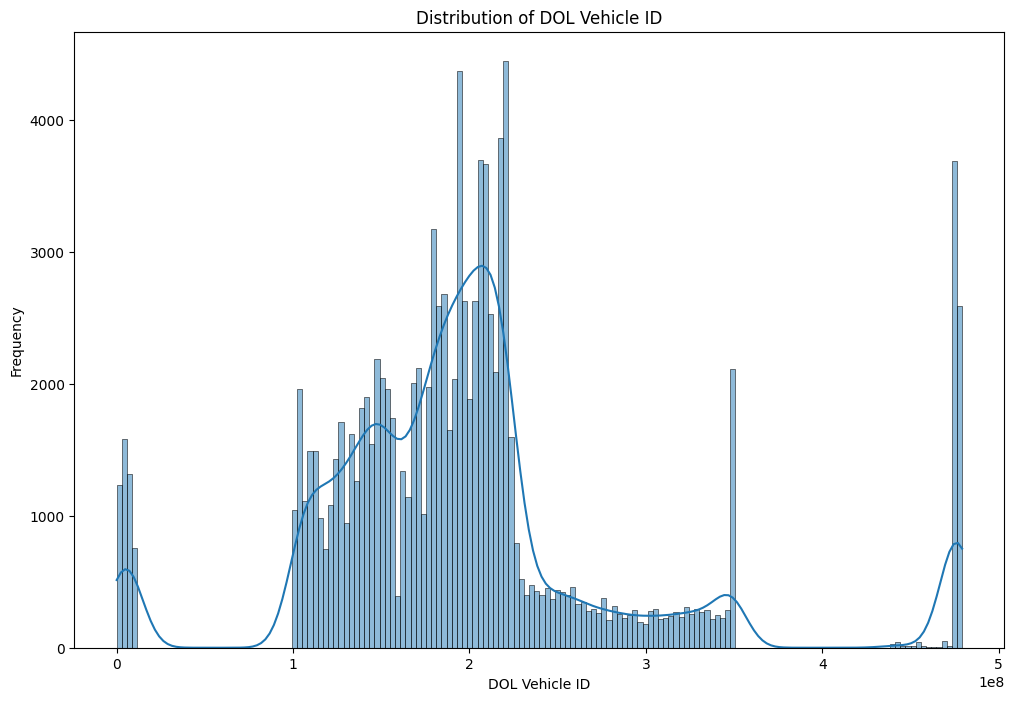

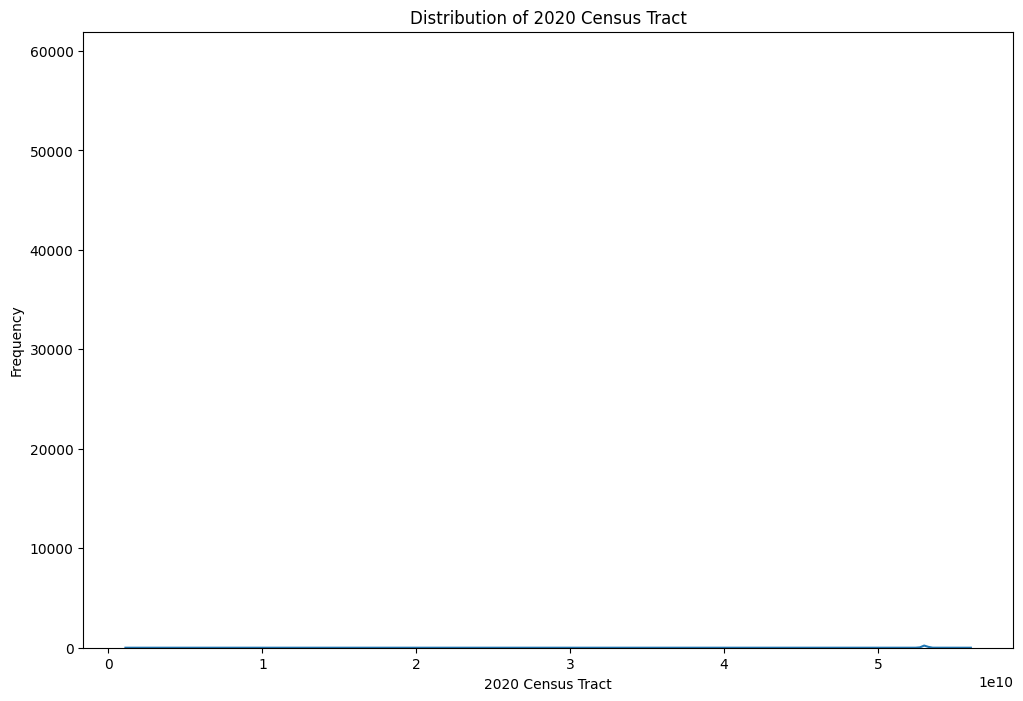

In [ ]:
for col in num_df.columns:
  plt.figure(figsize=(12,8))
  sns.histplot(num_df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.ylabel('Frequency')
  plt.xlabel(col)
  plt.show()



*    most electric vehicles have a relatively low MSRP (Manufacturer's Suggested Retail Price),the chart we made chart suggests that the vast majority of electric vehicles in the dataset are priced at the lower end, while only a few vehicles have a very high MSRP, indicating skewness in pricing data.

*   A large number of vehicles have very low electric ranges (close to zero), which might imply that some entries could represent plug-in hybrids or vehicles with extremely limited electric capabilities.


*   There has been a significant increase in electric vehicle models over the years, particularly after 2010, with the number of models peaking around 2020-2022.
This trend highlights the growing adoption of electric vehicles, with a major acceleration in production in the last decade, indicating increased popularity and production of EVs in recent years.





In [ ]:
high_cardinality_columns = ['Electric Utility', 'Vehicle Location', 'Model', 'State', 'City','County', 'VIN (1-10)']

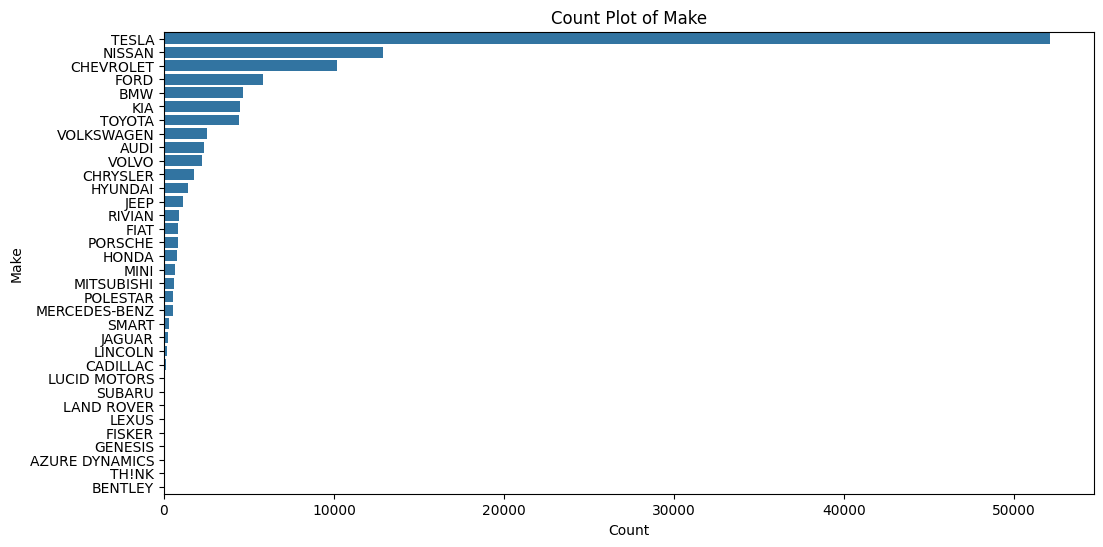

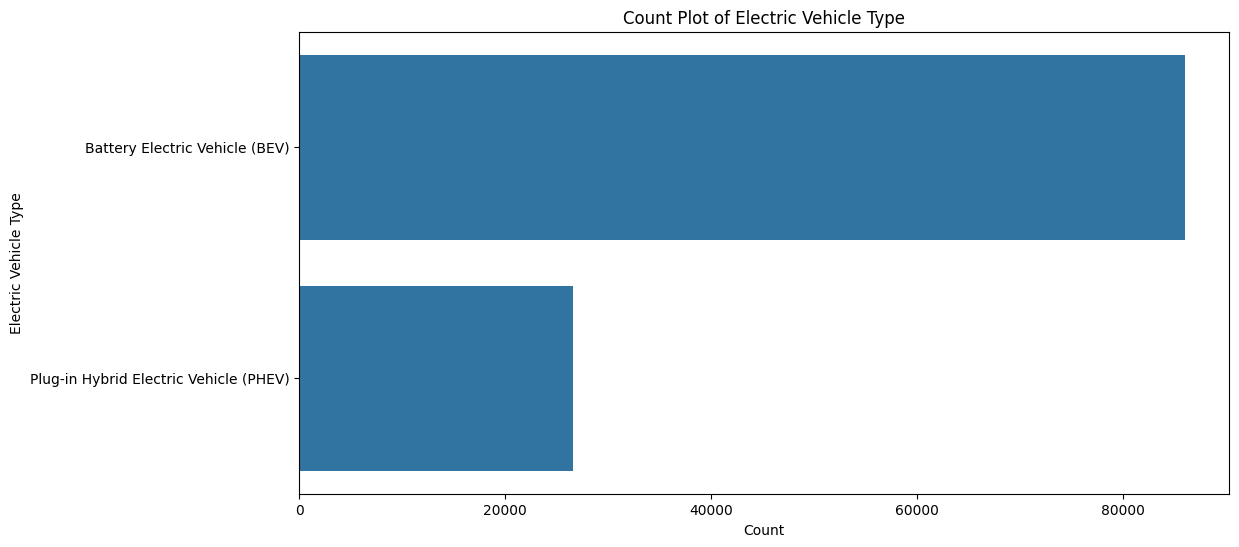

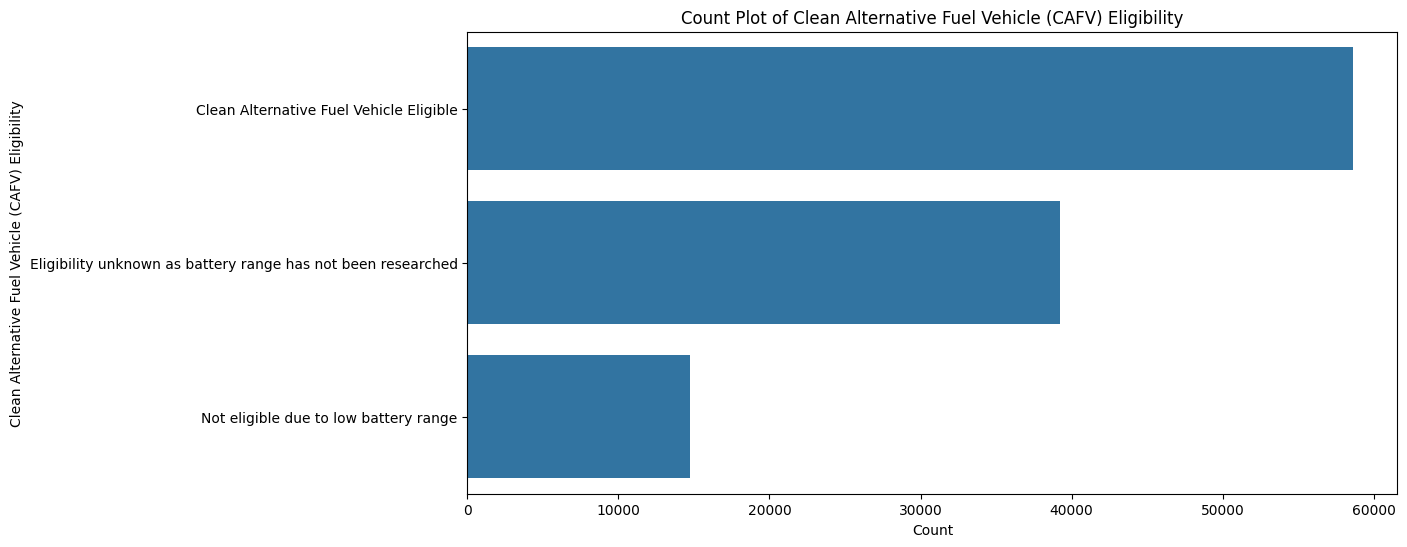

In [ ]:
for col in cat_df.columns:
  if col not in high_cardinality_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=cat_df[col], order=cat_df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()



*  Most of the vehicles in the dataset are Eligible for Clean Alternative Fuel Vehicle
*   We have a majority count of BEVs in the dataset (more than 80,000) and the count of PHEVs is just above 20,000
*   Telsa Nissan and Chevrolet were the producers of maximum number of Vehicles with Telsa EVs being increadibly high in numbers






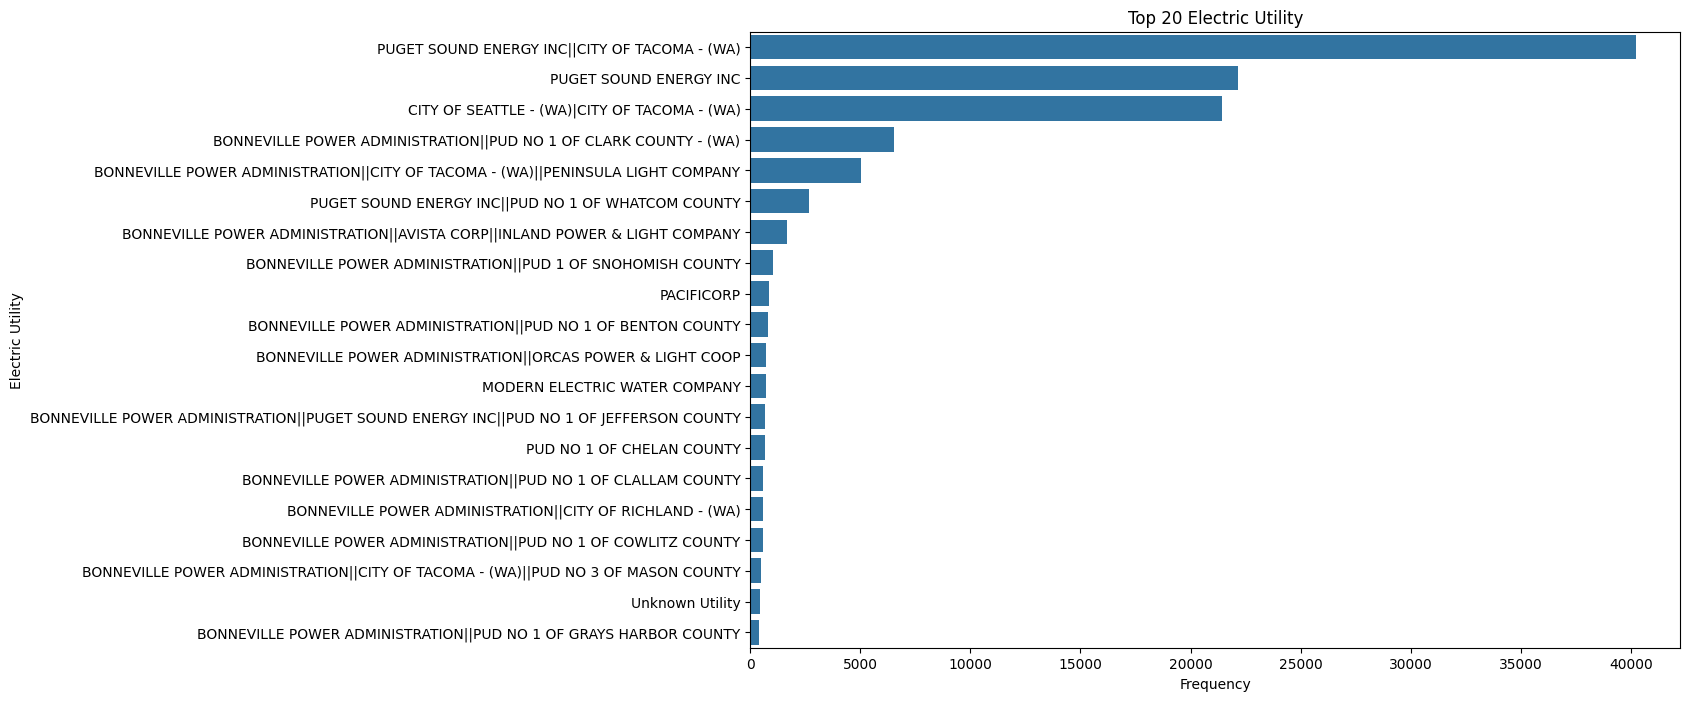

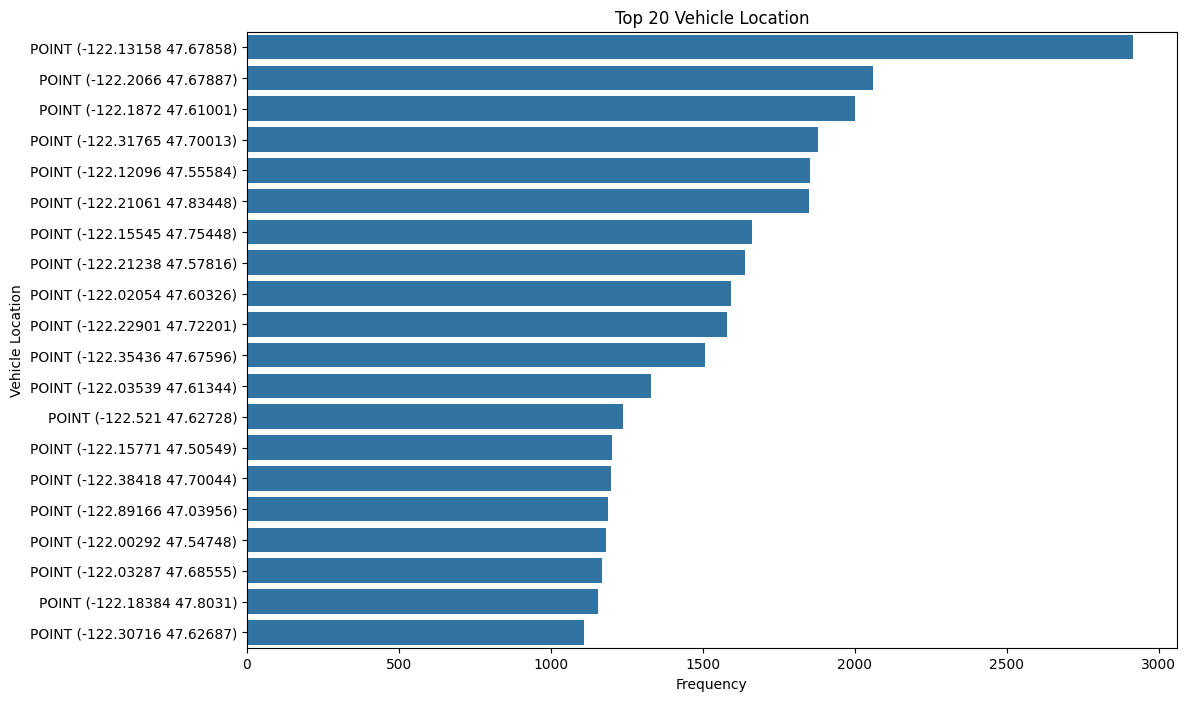

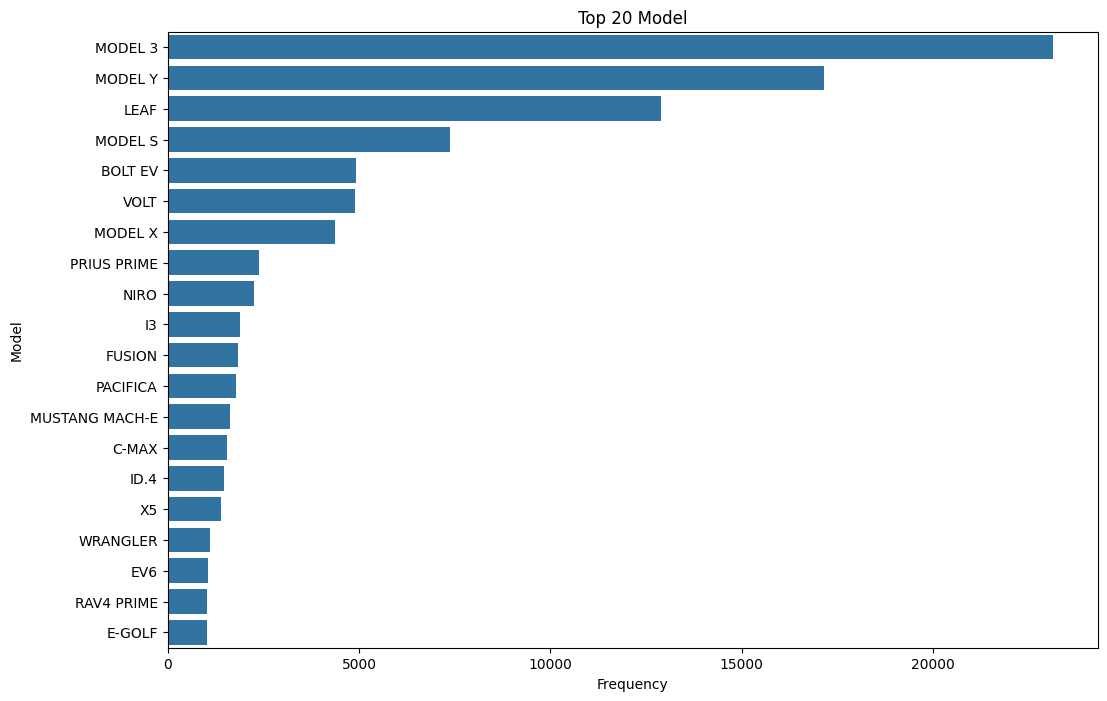

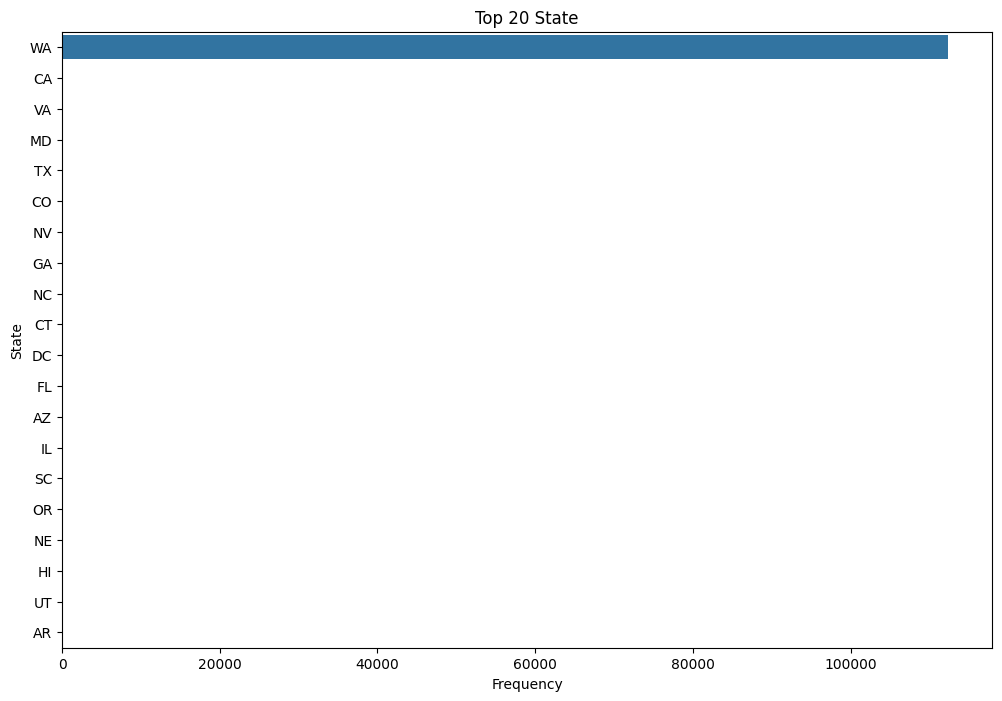

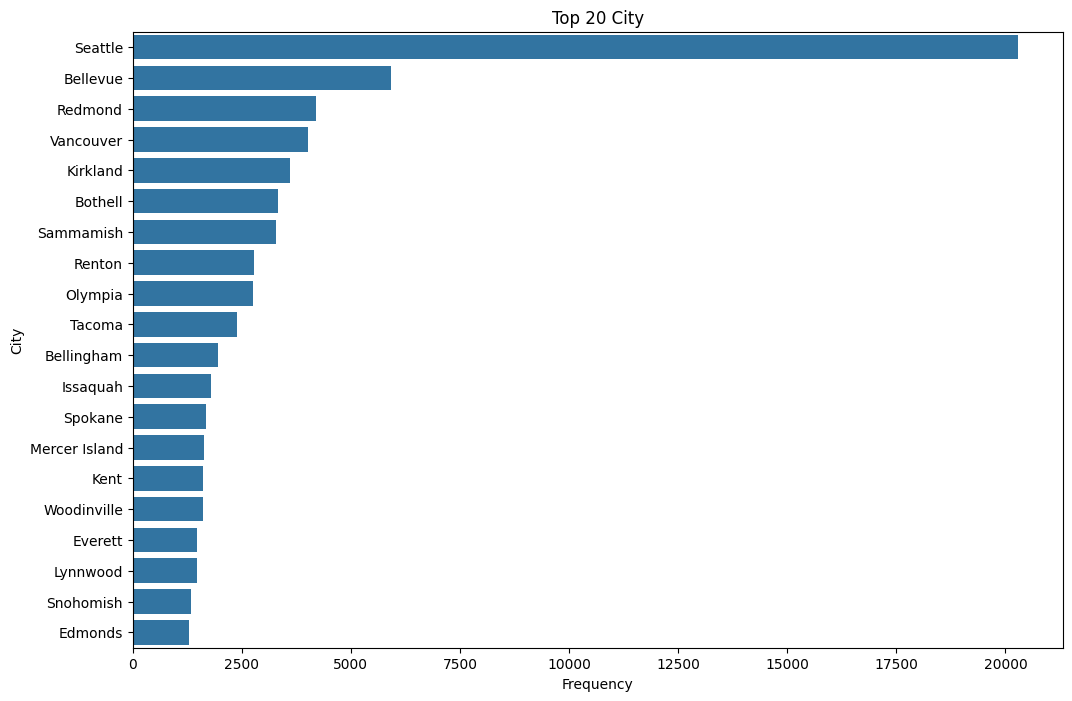

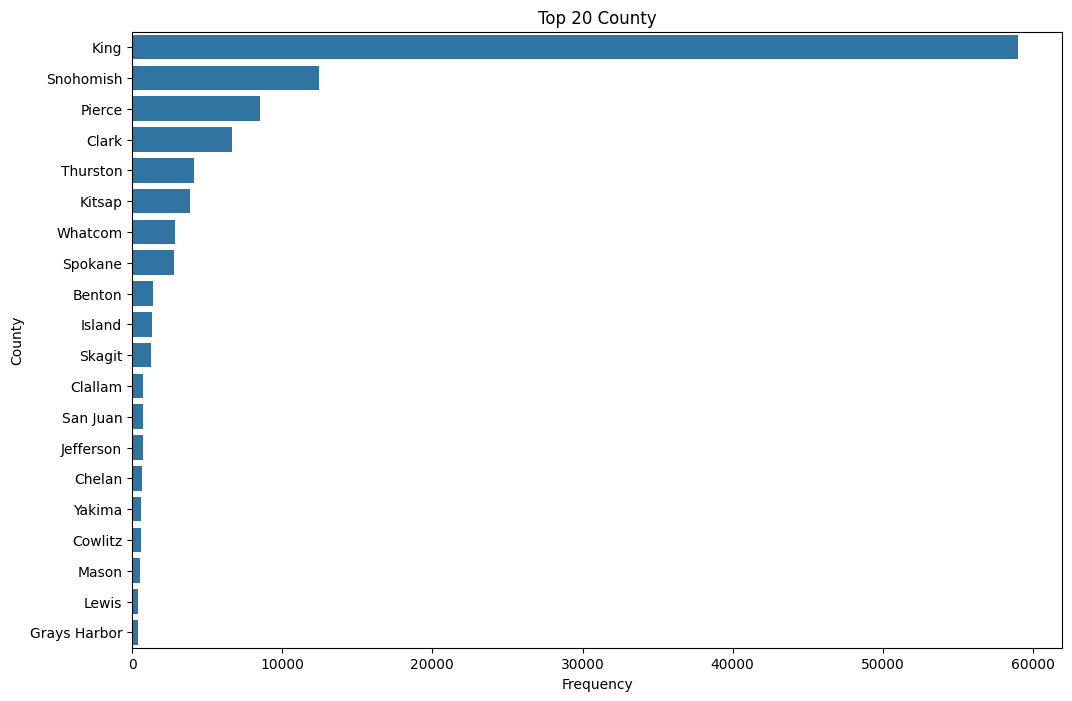

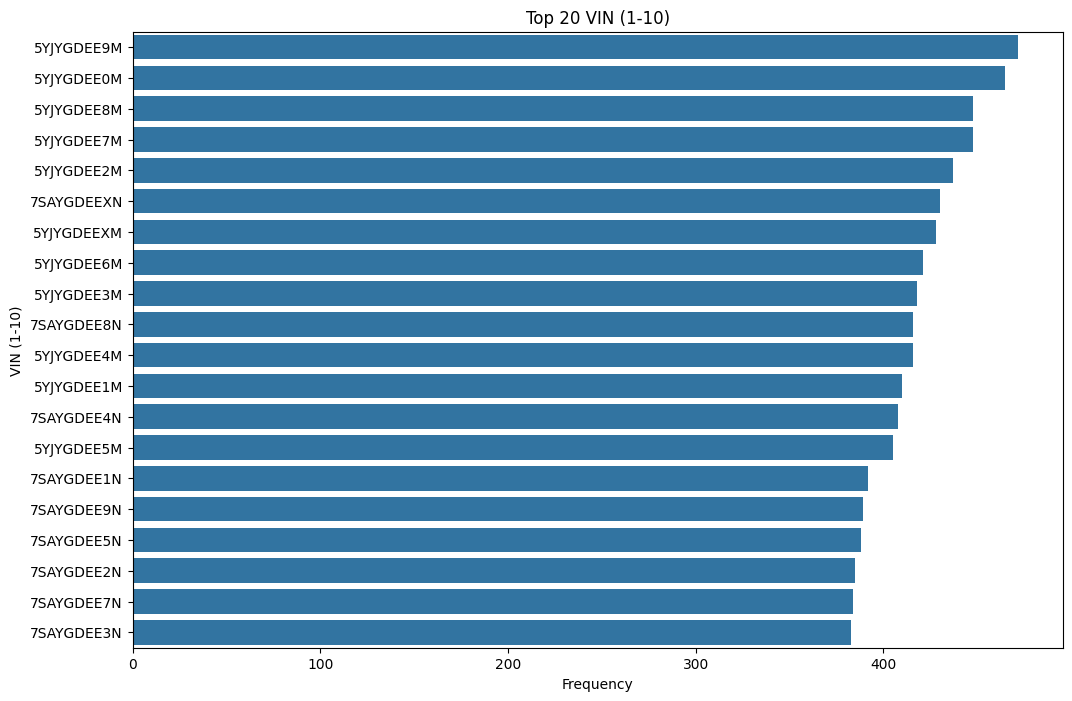

In [ ]:
top_n = 20
for column in high_cardinality_columns:
    plt.figure(figsize=(12, 8))
    top_categories = df[column].value_counts().nlargest(top_n)
    sns.barplot(x=top_categories.values, y=top_categories.index)
    plt.title(f'Top {top_n} {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()



*   Washington was the state with highest EV uage, Seattle(in Washington) being the city with highest EV usage
*   Model 3, model Y, LEAF were the top 3 models



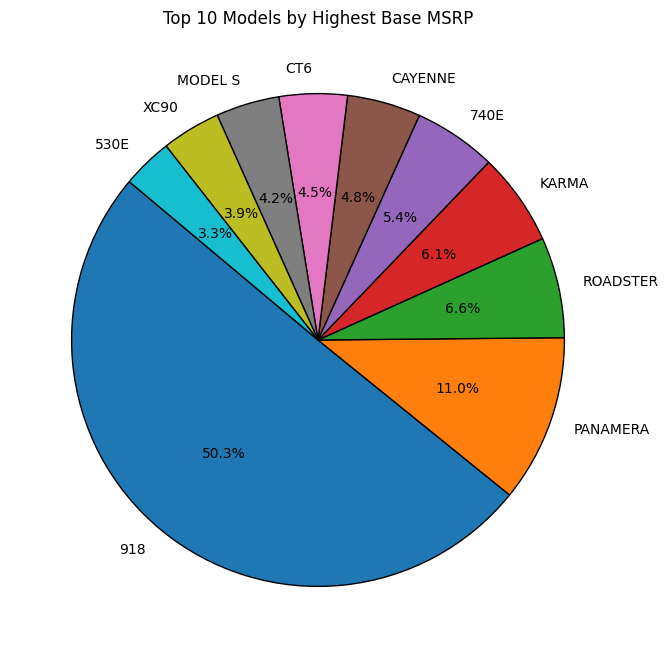

In [ ]:
top_10_models = df[['Model', 'Base MSRP']].sort_values(by='Base MSRP', ascending=False).groupby('Model').max().nlargest(10, 'Base MSRP')
#top_10_models = df.groupby('Model')['Base MSRP'].max().nlargest(10)

plt.figure(figsize=(10, 8))
plt.pie(top_10_models['Base MSRP'], labels=top_10_models.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Top 10 Models by Highest Base MSRP')
plt.show()

The model "918" dominates the chart, representing 50.3% of the total among the top models, indicating that it is significantly more expensive than other models. The model "Panamera" comes next at 11.0%, followed by others like "Roadster" and "Karma". This suggests that a few luxury models are driving the bulk of the highest price points, with "918" clearly being the most premium among the top 10.

**Bivariate Analysis**

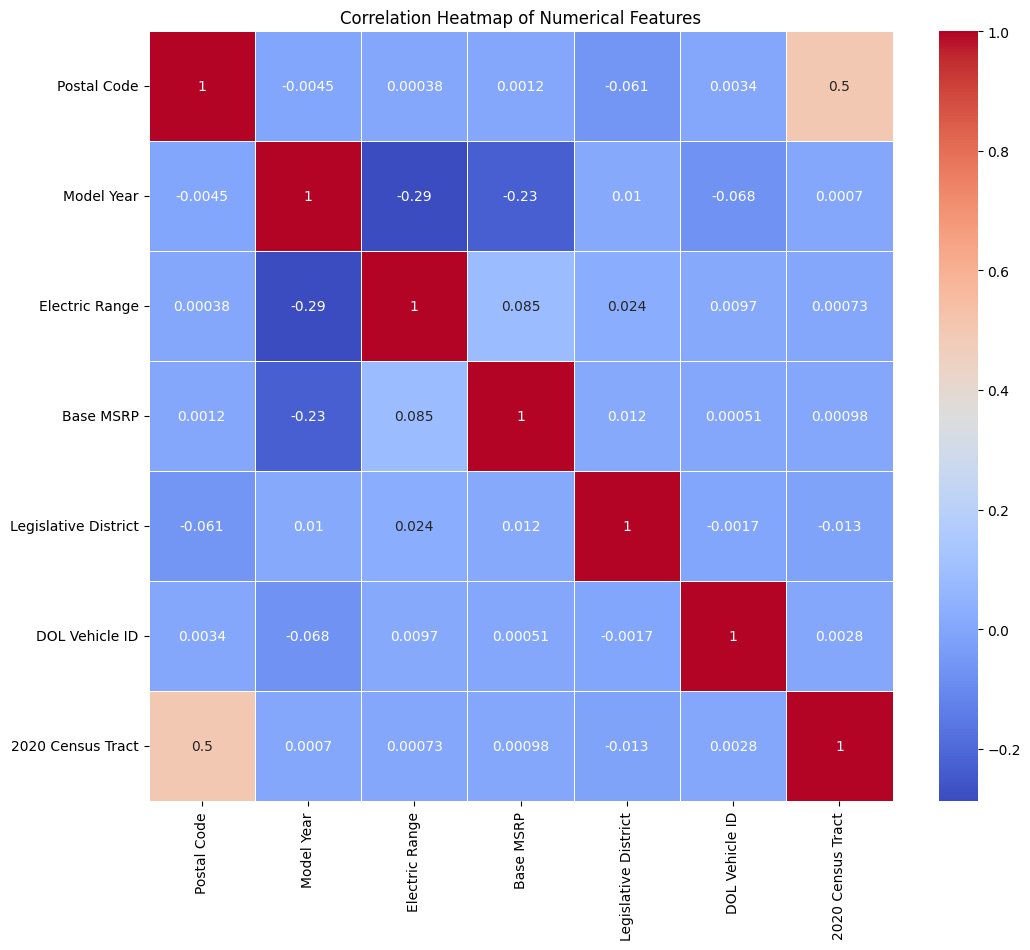

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# LLets analyse different features based on Base MSRP feature

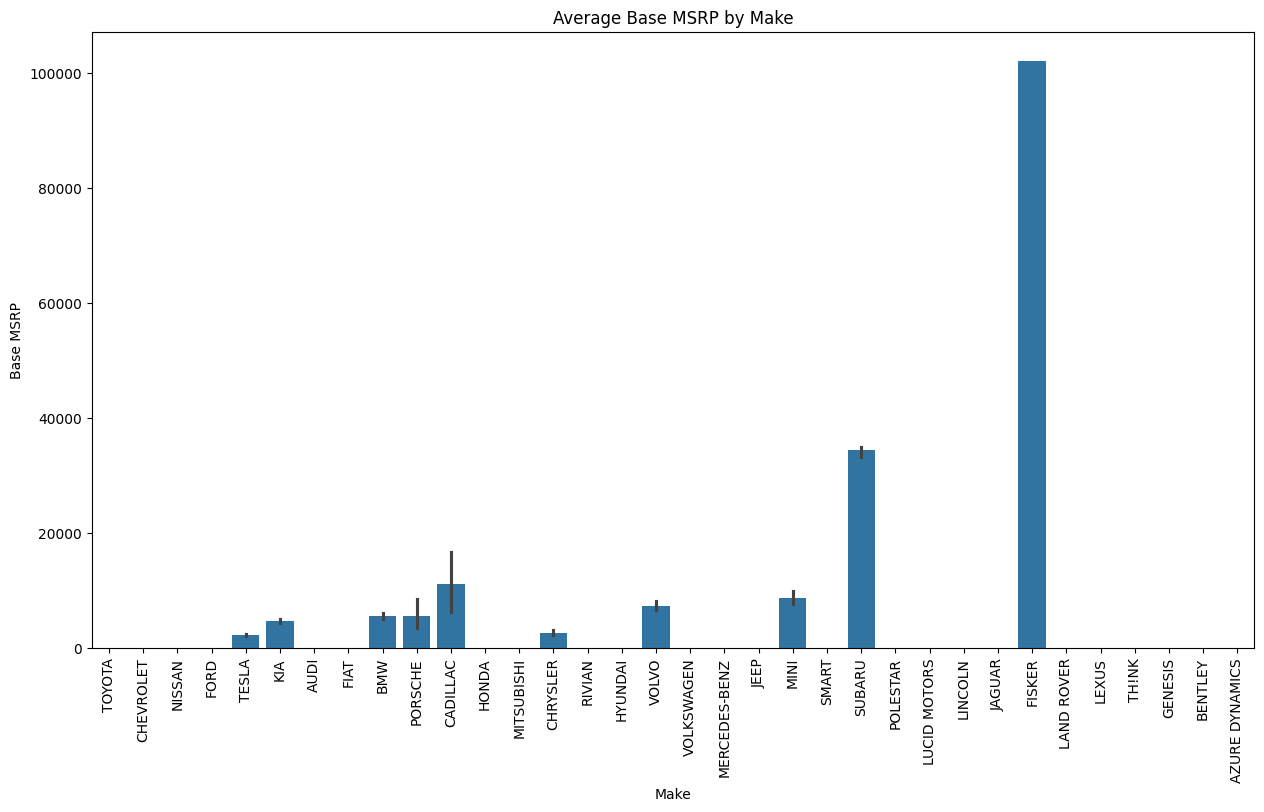

In [ ]:
# lets Analyse Make and Base MSRP features
plt.figure(figsize=(15, 8))
sns.barplot(x='Make', y='Base MSRP', data=df)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Base MSRP')
plt.title('Average Base MSRP by Make')
plt.show()



*   Jaguar has the highest average MSRP, which is significantly higher than all other makes. This indicates that Jaguar offers luxury vehicles compared to other brands.
Other manufacturers like Cadillac and Polestar also have relatively higher average MSRPs, suggesting they target a premium segment.
Most manufacturers, such as Toyota, Chevrolet, Ford, and Nissan, have relatively lower MSRPs, indicating their focus on affordable electric vehicles.
*  *It's possible that MSRP information for some of the electric vehicles is missing or not recorded correctly, leading to zero values in the dataset.*



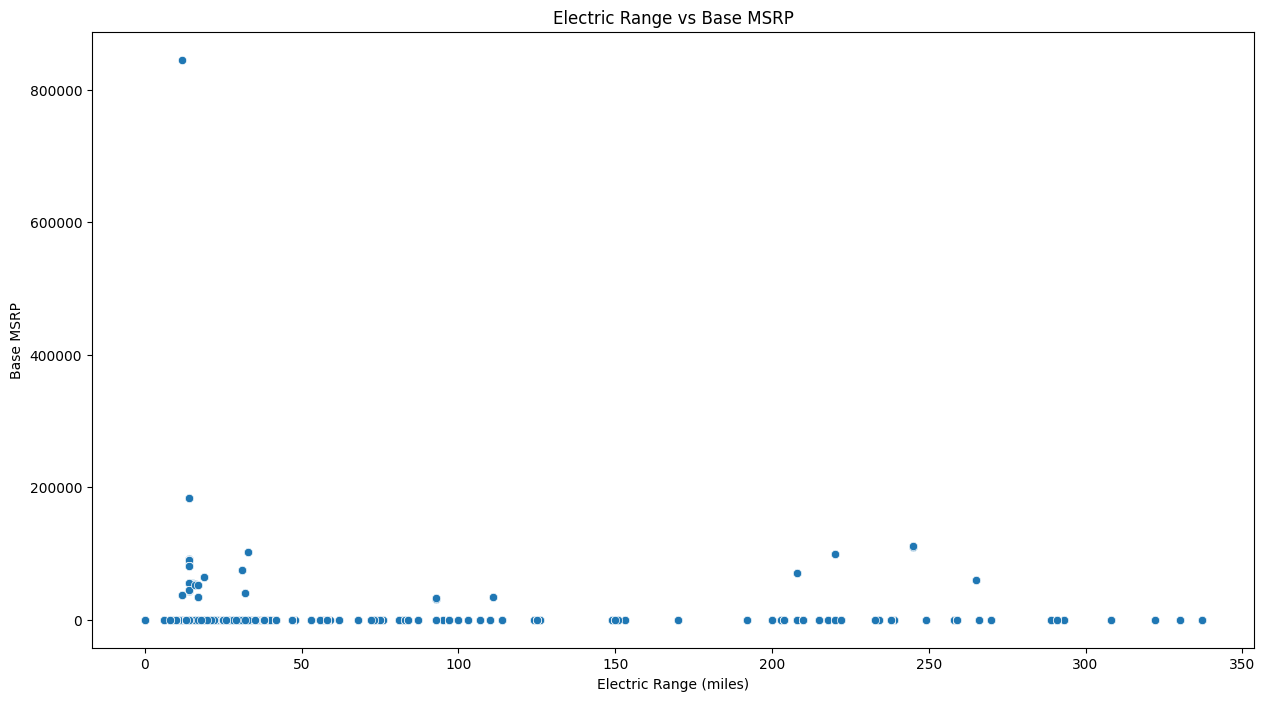

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP')
plt.show()

There is no clear linear correlation between Electric Range and Base MSRP. Some of the high MSRP vehicles still have lower electric ranges.


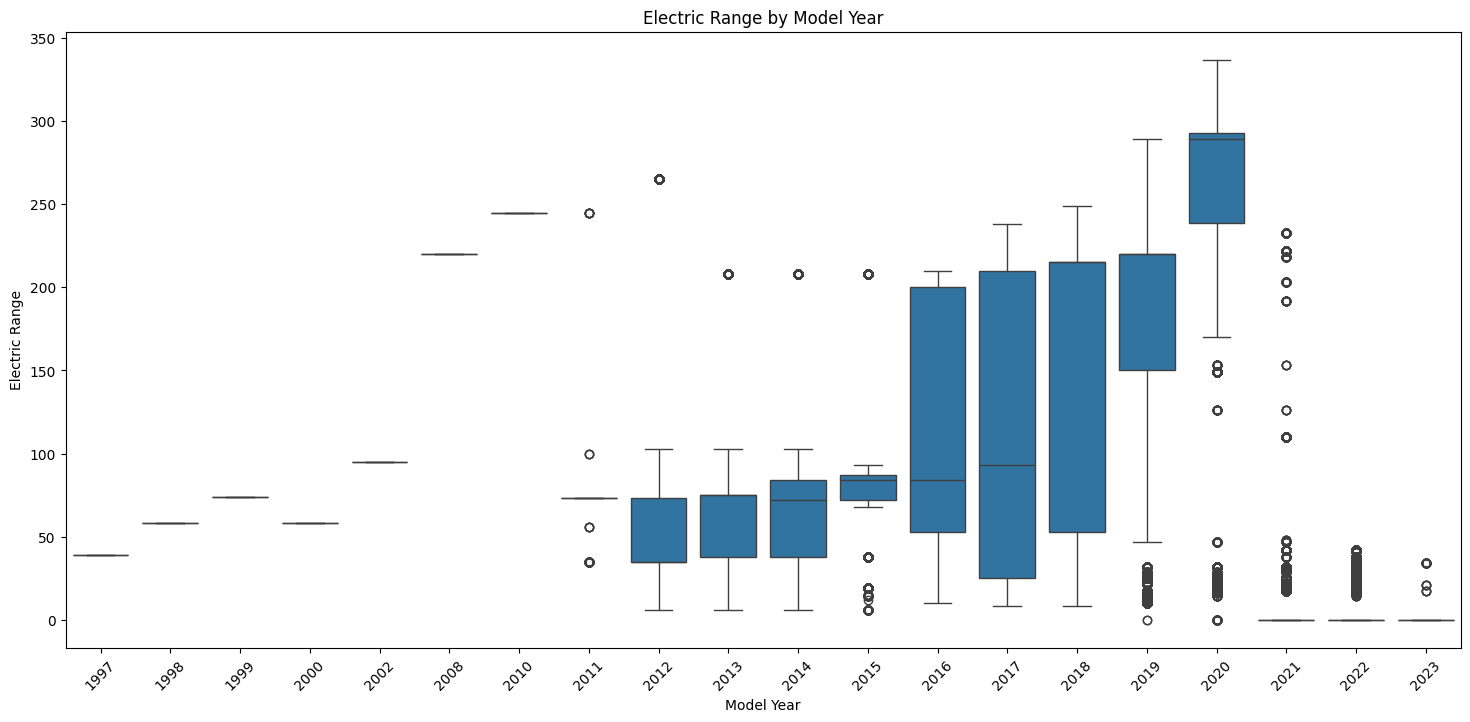

In [ ]:
#Lets Determine how the electric range has evolved over the years.
plt.figure(figsize=(18, 8))
sns.boxplot(x='Model Year', y='Electric Range', data=df)
plt.xticks(rotation=45)
plt.title('Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()






*   Electric Range has improved significantly over the years,
especially from 2016 onward. Vehicles produced in recent years (2018-2022) tend to have a higher electric range, with median values and maximum ranges consistently increasing.
*   The variation in electric range also becomes more significant in recent years, which might be attributed to advances in battery technology and differentiation among vehicle models.
*   Earlier model years have lower ranges, and their values are quite consistent, suggesting limited diversity in technology in the early stages of EV development.




# choropleth map

In [ ]:
ev_count_by_state = df['State'].value_counts().reset_index()
ev_count_by_state.columns = ['State', 'Number of EVs']

# Creating a choropleth map using Plotly Express
fig = px.choropleth(
    ev_count_by_state,
    locations='State',
    locationmode='USA-states',  # This tells Plotly to look for US states abbreviations
    color='Number of EVs',
    hover_name='State',
    color_continuous_scale='Viridis',
    scope='usa',  # To focus on the USA only
    title='Number of Electric Vehicles by State'
)

# Display the figure
fig.show()



*   The choropleth chart can visually depict the density of EV registrations across different regions. This helps identify which areas have higher concentrations of electric vehicles.
*  we can identify how different regions or states compare in terms of EV adoption.

*   Regions with favorable EV policies might show higher vehicle registrations. This chart can help correlate the presence of these policies with EV densities.







# racing bar plot

- WE WILL USE 2 APPROACHES TO MAKE RACING BAR PLOT

In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Aggregate the data to count the number of vehicles by Make and Model Year
ev_make_year_count = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Step 2: Create the animated racing bar plot using Plotly Express
fig = px.bar(
    ev_make_year_count,
    x='Make',
    y='Count',
    color='Make',
    animation_frame='Model Year',
    title='Number of Electric Vehicles by Make (Racing Bar Plot)',
    labels={'Make': 'EV Make', 'Count': 'Number of EVs'},
    template='plotly_white'
)

# Adjust layout settings for better visualization
fig.update_layout(
    xaxis={'categoryorder': 'total ascending'},
    yaxis_title='Number of Electric Vehicles',
    xaxis_title='Electric Vehicle Make',
    showlegend=False
)

# Show the figure
fig.show()

In [ ]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
data = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

# Ensure the years are sorted if they aren't already
data.sort_index(inplace=True)

In [ ]:
import bar_chart_race as bcr
import matplotlib.font_manager

# Checking for available fonts and switching to Arial if Helvetica is not available
if 'Helvetica' not in [f.name for f in matplotlib.font_manager.fontManager.ttflist]:
    font_family = 'Arial'
else:
    font_family = 'Helvetica'

bcr.bar_chart_race(
    df=data,
    filename=None,  yter
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total vehicles: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': font_family},
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='EV Make Count by Year',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family': font_family, 'color': '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=True)


Streaming output truncated to the last 5000 lines.
